In [4]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import TensorBoard
import os
import datetime 
import IPython
import IPython.display
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_squared_error


mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

In [5]:
csv_path = r"C:\Users\zahiz\Desktop\Capstone_Day1_Covid19\cases_malaysia.csv"

df = pd.read_csv(csv_path,index_col='date', parse_dates=['date'])
df.head()


,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,cases_child,...,cases_60_69,cases_70_79,cases_80,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
date,,,,,,,,,,,,,,,,,,,,,
2020-01-25,4,4,0,4,0,4,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-26,0,0,0,4,0,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-27,0,0,0,4,0,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-28,0,0,0,4,0,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-29,3,3,0,7,0,3,0,0,0,1,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cases_new,1744.0,3050.001720,5588.837322,0.0,128.75,803.0,3200.00,33406.0
cases_import,1744.0,22.502867,76.601202,0.0,1.00,3.0,8.00,719.0
cases_recovered,1744.0,3023.658257,5540.421141,0.0,117.75,796.5,3227.50,33872.0
cases_active,1744.0,37942.768922,61800.088695,1.0,8460.25,13839.0,36568.00,323791.0
cases_cluster,1744.0,306.498280,619.205875,0.0,0.00,7.0,269.25,3394.0
cases_unvax,1744.0,1172.648509,2339.900620,0.0,24.00,125.0,1162.75,12681.0
cases_pvax,1744.0,250.495413,997.565343,0.0,0.00,2.0,19.00,7315.0
cases_fvax,1744.0,813.951261,1935.319149,0.0,1.00,44.0,439.00,13058.0
cases_boost,1744.0,812.906537,2248.538349,0.0,0.00,83.0,496.25,18176.0
cases_child,1744.0,371.459289,772.875075,0.0,8.75,48.0,245.25,4389.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1744 entries, 2020-01-25 to 2024-11-02
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cases_new                1744 non-null   int64  
 1   cases_import             1744 non-null   int64  
 2   cases_recovered          1744 non-null   int64  
 3   cases_active             1744 non-null   int64  
 4   cases_cluster            1744 non-null   int64  
 5   cases_unvax              1744 non-null   int64  
 6   cases_pvax               1744 non-null   int64  
 7   cases_fvax               1744 non-null   int64  
 8   cases_boost              1744 non-null   int64  
 9   cases_child              1744 non-null   int64  
 10  cases_adolescent         1744 non-null   int64  
 11  cases_adult              1744 non-null   int64  
 12  cases_elderly            1744 non-null   int64  
 13  cases_0_4                1744 non-null   int64  
 14  cases_

In [8]:
df.isna().sum()

cases_new                    0
cases_import                 0
cases_recovered              0
cases_active                 0
cases_cluster                0
cases_unvax                  0
cases_pvax                   0
cases_fvax                   0
cases_boost                  0
cases_child                  0
cases_adolescent             0
cases_adult                  0
cases_elderly                0
cases_0_4                    0
cases_5_11                   0
cases_12_17                  0
cases_18_29                  0
cases_30_39                  0
cases_40_49                  0
cases_50_59                  0
cases_60_69                  0
cases_70_79                  0
cases_80                     0
cluster_import             570
cluster_religious          570
cluster_community          570
cluster_highRisk           570
cluster_education          570
cluster_detentionCentre    570
cluster_workplace          570
dtype: int64

In [9]:
columns_to_fill = [
    'cluster_import', 'cluster_religious', 'cluster_highRisk', 
    'cluster_education', 'cluster_detentionCentre', 
    'cluster_workplace', 'cluster_community'
]

# Loop through each column and apply fillna(0)
for col in columns_to_fill:
    df[col] = df[col].fillna(0)

In [10]:
df.isna().sum()

cases_new                  0
cases_import               0
cases_recovered            0
cases_active               0
cases_cluster              0
cases_unvax                0
cases_pvax                 0
cases_fvax                 0
cases_boost                0
cases_child                0
cases_adolescent           0
cases_adult                0
cases_elderly              0
cases_0_4                  0
cases_5_11                 0
cases_12_17                0
cases_18_29                0
cases_30_39                0
cases_40_49                0
cases_50_59                0
cases_60_69                0
cases_70_79                0
cases_80                   0
cluster_import             0
cluster_religious          0
cluster_community          0
cluster_highRisk           0
cluster_education          0
cluster_detentionCentre    0
cluster_workplace          0
dtype: int64

In [11]:
# df['date'] = pd.to_datetime(df['date'])

In [12]:
df.head()

,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,cases_child,...,cases_60_69,cases_70_79,cases_80,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
date,,,,,,,,,,,,,,,,,,,,,
2020-01-25,4,4,0,4,0,4,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,0,0,0,4,0,0,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-27,0,0,0,4,0,0,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-28,0,0,0,4,0,0,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-29,3,3,0,7,0,3,0,0,0,1,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1744 entries, 2020-01-25 to 2024-11-02
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cases_new                1744 non-null   int64  
 1   cases_import             1744 non-null   int64  
 2   cases_recovered          1744 non-null   int64  
 3   cases_active             1744 non-null   int64  
 4   cases_cluster            1744 non-null   int64  
 5   cases_unvax              1744 non-null   int64  
 6   cases_pvax               1744 non-null   int64  
 7   cases_fvax               1744 non-null   int64  
 8   cases_boost              1744 non-null   int64  
 9   cases_child              1744 non-null   int64  
 10  cases_adolescent         1744 non-null   int64  
 11  cases_adult              1744 non-null   int64  
 12  cases_elderly            1744 non-null   int64  
 13  cases_0_4                1744 non-null   int64  
 14  cases_

In [14]:
# df['cases_new'] = pd.to_numeric(df['cases_new'], errors='coerce')

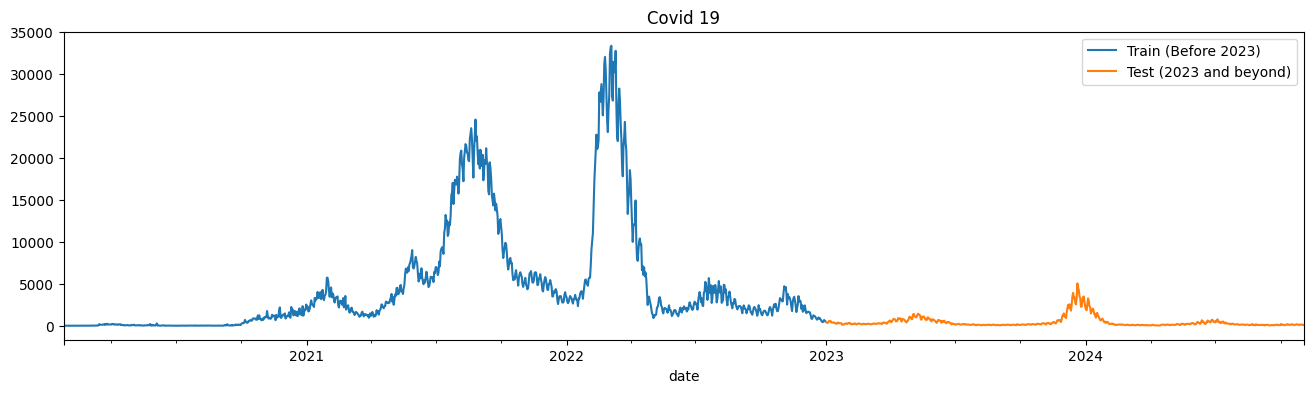

In [15]:
tstart = 2020
tend = 2022

def train_test_plot(df,tstart,tend):
    df.loc[f'{tstart}':f'{tend}','cases_new'].plot(figsize=(16,4),label=f"Train (Before {tend+1})")
    df.loc[f'{tend+1}':, 'cases_new'].plot(figsize=(16,4),label=f"Test ({tend+1} and beyond)")
    plt.legend()
    plt.title('Covid 19')
    plt.show()

train_test_plot(df,tstart,tend)

In [16]:
def train_test_split(df,tstart,tend):
    train = df.loc[f"{tstart}":f"{tend}","cases_new"].values
    test = df.loc[f"{tend+1}":,"cases_new"].values
    return train,test

training_set,test_set = train_test_split(df,tstart,tend)

In [17]:
sc = MinMaxScaler(feature_range=(0,1))
training_set = training_set.reshape(-1,1)
training_set_scaled = sc.fit_transform(training_set)
# print(type(training_set_scaled))
# print(training_set_scaled.shape)
print(training_set_scaled[:5])

[[1.19738969e-04]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [8.98042268e-05]]


In [18]:
arr = np.array([1,2,3,4,5,6])
print(arr.shape)

print(arr.reshape(3,-1).shape)

(6,)
(3, 2)


In [19]:
def split_sequence(sequence,n_steps):
    X,y = list(),list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x,seq_y = sequence[i:end_ix],sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X),np.array(y)

n_steps = 60
features = 1
# split into samples
X_train,y_train = split_sequence(training_set_scaled,n_steps)

In [20]:
# Reshape X_train for model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],features)
print(X_train.shape)

(1012, 60, 1)


In [21]:
# The LSTM Architecture
model_lstm = Sequential()
model_lstm.add(LSTM(units=32,activation='tanh',input_shape=(n_steps,features),return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=64))
model_lstm.add(Dense(units=1))
# Compiling the model
model_lstm.compile(optimizer='adam',loss='mse', metrics=['mae'])

print(model_lstm.summary())

c:\Users\zahiz\anaconda\envs\ypai09\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 32)         │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,249 (114.25 KB)

 Trainable params: 29,249 (114.25 KB)

 Non-trainable params: 0 (0.00 B)

None


In [22]:

logpath = "tensorboard/ts_single" + datetime.datetime.now().strftime("%Y-%m-%d_%H%M%S")
tb = keras.callbacks.TensorBoard(logpath)

In [23]:
model_lstm.fit(X_train,y_train,epochs = 50,batch_size=32, callbacks=([tb]))

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0238 - mae: 0.0890
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0039 - mae: 0.0345
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0024 - mae: 0.0271
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0015 - mae: 0.0222
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0022 - mae: 0.0263
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0019 - mae: 0.0245
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0018 - mae: 0.0237
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0020 - mae: 0.0231
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0016 - mae: 0.0243
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0018 - mae: 0.0243
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0013 - mae: 0.0208
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0015 - mae: 0.0240
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━

In [24]:
dataset_total = df.loc[:,'cases_new']
inputs = dataset_total[len(dataset_total) - len(test_set) - n_steps :].values
inputs = inputs.reshape(-1,1)
# scaling
inputs = sc.transform(inputs)

# Split into samples
X_test,y_test = split_sequence(inputs,n_steps)
# reshape
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],features)
# predictions
predicted_covid = model_lstm.predict(X_test)
# inverse transform the values - undo the normalization of stock prices (undo any sklearn's transform)
predicted_covid = sc.inverse_transform(predicted_covid)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [25]:
def plot_predictions(test,predicted):
    plt.plot(test,color='gray',label='Real')
    plt.plot(predicted,color='red',label='Predicted')
    plt.title('Covid19 Prediction')
    plt.xlabel('Time')
    plt.ylabel('Covid19 Cases')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = np.sqrt(mean_squared_error(test,predicted))
    print('The root mean square error is {:.2f}.'.format(rmse))

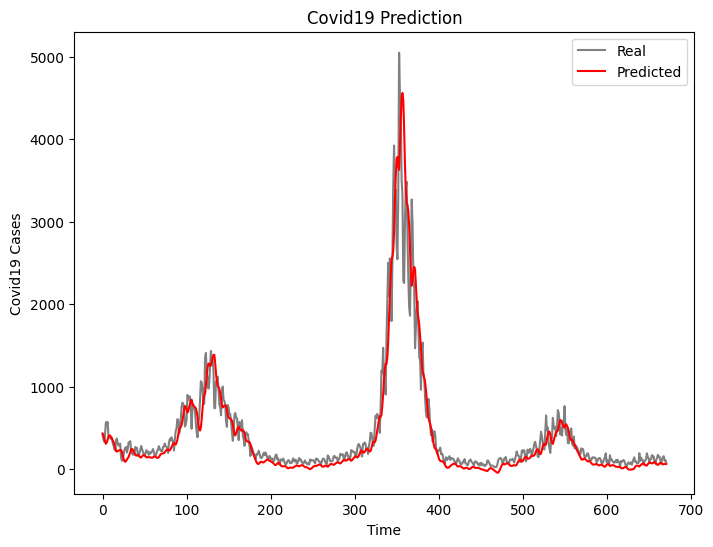

In [26]:
plot_predictions(test_set,predicted_covid)

In [27]:
evaluation = model_lstm.evaluate(X_test,y_test)
print(evaluation)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.7881e-05 - mae: 0.0035 
[4.727493069367483e-05, 0.0036470401100814342]


In [28]:
mae = evaluation[1]
print(f"mae \n: {mae}")

mae 
: 0.0036470401100814342


In [29]:
mape = mae/sum(abs(y_test)) * 100
print(mape)

[0.04164861]


In [30]:
print(return_rmse(y_test,predicted_covid))

The root mean square error is 821.19.
None


In [31]:
import pickle

MODEL_PATH = os.path.join(os.getcwd(),'model','covid19.pkl')

with open(MODEL_PATH, 'wb') as file:
    pickle.dump(model_lstm,file)